In [ ]:
# Write a program to simulate a binary bandit problem, where each action has a binary (0 or 1) reward. It
# should use the upper confidence bound algorithm to estimate action values and make decisions based on
# the highest estimated value.

# Name: Sharvari Pramod Jape
# Class: B.E AIML
# Roll No: 43526

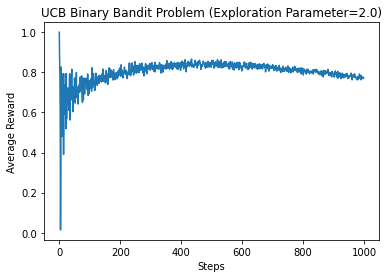

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def ucb_bandit(num_actions, true_action_values, num_steps, exploration_param):
    action_values = np.zeros(num_actions)  # Estimated action values
    action_counts = np.zeros(num_actions)  # Counts of each action taken
    rewards = np.zeros(num_steps)  # Accumulated rewards over time
    estimated_values_log = np.zeros((num_steps, num_actions))  # Log estimated values for each action at each step

    for step in range(num_steps):
        # UCB formula to choose action
        ucb_values = action_values + exploration_param * np.sqrt(np.log(step + 1) / (action_counts + 1e-6))
        action = np.argmax(ucb_values)

        # Get the binary reward for the chosen action (0 or 1)
        reward = np.random.choice([0, 1], p=[1 - true_action_values[action], true_action_values[action]])

        # Update action values and counts
        action_counts[action] += 1
        action_values[action] += (reward - action_values[action]) / action_counts[action]

        # Store the reward and estimated values for plotting
        rewards[step] = reward
        estimated_values_log[step, :] = action_values

    return rewards, estimated_values_log

def run_binary_bandit(num_actions, true_action_values, num_steps, num_runs, exploration_param):
    average_rewards = np.zeros(num_steps)
    total_estimated_values_log = np.zeros((num_steps, num_actions))

    for _ in range(num_runs):
        rewards, estimated_values_log = ucb_bandit(num_actions, true_action_values, num_steps, exploration_param)
        average_rewards += (rewards - average_rewards) / (np.arange(num_steps) + 1)
        total_estimated_values_log += estimated_values_log

    # Calculate the average estimated values
    average_estimated_values_log = total_estimated_values_log / num_runs

    return average_rewards, average_estimated_values_log

if __name__ == "__main__":
    np.random.seed(42)

    # Problem setup
    num_actions = 5
    true_action_values = np.random.rand(num_actions)  # True action values as random probabilities
    exploration_param = 2.0  # UCB exploration parameter
    num_steps = 1000
    num_runs = 2000

    # Run UCB algorithm
    average_rewards, average_estimated_values_log = run_binary_bandit(num_actions, true_action_values, num_steps, num_runs, exploration_param)

    # Plot the results
    plt.plot(average_rewards)
    plt.title(f"UCB Binary Bandit Problem (Exploration Parameter={exploration_param})")
    plt.xlabel("Steps")
    plt.ylabel("Average Reward")
    plt.show()

    # Print the estimated values at each step
#     for step in range(num_steps):
#         print(f"Step {step + 1}: Estimated Values =", average_estimated_values_log[step])
